In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis

from wordcloud import WordCloud


import warnings
warnings.filterwarnings("ignore")

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from collections import Counter


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM , GRU , Dropout , Normalization , Embedding , Bidirectional , SpatialDropout1D , GlobalMaxPooling1D

# SmartSMS: Spam and Intent Detection with LSTM-GRU 📩

### **Overview of SmartSMS: Spam and Intent Detection with LSTM-GRU**

**Project Title:**  
SMS Spam Detection Using Natural Language Processing (NLP) with LSTM and GRU Models  

**Description:**  
This project aims to develop an efficient and accurate system for detecting spam messages in SMS communication using advanced Natural Language Processing (NLP) techniques. By leveraging deep learning architectures such as Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU), the system can understand and analyze the sequential patterns in text data to classify SMS messages as either spam or legitimate.

**Problem Statement:**  
With the growing reliance on mobile communication, SMS has become a primary medium for exchanging information. However, the prevalence of spam messages, including advertisements, scams, and phishing attempts, has posed significant challenges for users and service providers. Manual filtering or traditional rule-based methods for spam detection often fail to address the complexity and evolving nature of spam content.  

An effective spam detection system is essential to enhance user safety, ensure better communication quality, and reduce unnecessary interruptions caused by spam messages.

**Objectives:**  
1. To preprocess and clean SMS text data for effective feature extraction.  
2. To implement deep learning models (LSTM and GRU) that can capture the contextual and sequential dependencies of text data.  
3. To evaluate the performance of the models based on metrics such as accuracy, precision, recall, and F1-score.  
4. To compare LSTM and GRU architectures to identify the most efficient model for SMS spam detection.  

**Proposed Solution:**  
The project leverages LSTM and GRU, which are specialized Recurrent Neural Networks (RNNs), for text classification. These models are well-suited for handling sequential data, like SMS text, by retaining context over longer text sequences. Key steps include:  

1. **Data Preprocessing:**  
   - Tokenization, stopword removal, and stemming/lemmatization to clean and normalize the text data.  
   - Encoding labels (spam/ham) and splitting the dataset into training and testing subsets.  

2. **Feature Representation:**  
   - Using word embeddings (e.g., GloVe, Word2Vec) or custom embeddings to represent text data in a numerical format suitable for deep learning models.  

3. **Model Training:**  
   - Building LSTM and GRU architectures to process the sequential text data and learn patterns associated with spam messages.  

4. **Evaluation and Comparison:**  
   - Assessing model performance on unseen test data.  
   - Comparing the results to select the optimal architecture for deployment.  

**Expected Outcome:**  
- A robust and accurate spam detection model capable of classifying SMS messages in real-time.  
- A comparative analysis of LSTM and GRU to understand their strengths and weaknesses in spam detection tasks.  

**Significance:**  
The project demonstrates the power of NLP and deep learning in addressing real-world challenges, providing a practical solution for spam message detection in the telecommunications industry. It also highlights the applicability of LSTM and GRU architectures in sequential data processing, contributing to advancements in text classification tasks.  

Would you like additional details or modifications to the description?

# Load dataset

In [2]:
path = r"/kaggle/input/sms-data/spam.csv"
df = pd.read_csv(path , encoding="ISO-8859-1")

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

Here’s a concise description based on the DataFrame info:

- **Entries:** 5572 rows, indexed from 0 to 5571.  
- **Columns:** 5 total, all of type `object`.  
  - **v1:** Fully populated (5572 non-null); contains target labels (e.g., `ham`, `spam`).  
  - **v2:** Fully populated (5572 non-null); contains SMS text messages.  
  - **Unnamed: 2, 3, 4:** Sparsely populated (50, 12, and 6 non-null entries respectively); likely metadata or auxiliary information.  
- **Memory Usage:** 217.8 KB.

Would you like this adapted further for a specific purpose?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB



- **v1:** Target label column with 5572 entries, 2 unique values (`ham` and `spam`), where "ham" is the most frequent (4825 occurrences).  
- **v2:** SMS text column with 5572 entries, 5169 unique messages. The most frequent message is "Sorry, I'll call later" (30 occurrences).  
- **Unnamed: 2, 3, 4:** Additional metadata columns with limited entries (50, 12, and 6 non-null rows, respectively), containing sparse and inconsistent data.

Would you like this expanded or further refined?

In [5]:
df.describe(include="all").T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Here’s a concise description after dropping unnecessary columns:

- **Dataset:** 5572 rows × 2 columns.  
- **Columns:**  
  - **v1:** Target labels (`ham` or `spam`), indicating whether the SMS is legitimate or spam.  
  - **v2:** SMS text messages containing the message content.  

Unnecessary columns were removed to focus solely on essential data for SMS classification.

In [7]:
df = df.drop(columns=["Unnamed: 2" , "Unnamed: 3" , "Unnamed: 4"] , axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.shape

(5572, 2)

In [9]:
df.rename(columns={"v1": "Target", "v2": "Text"}, inplace=True)

## Look at the dataset

In [10]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.isna().sum()

Target    0
Text      0
dtype: int64

In [13]:
df["Target"].value_counts()

Target
ham     4825
spam     747
Name: count, dtype: int64

In [14]:
dup = df.duplicated().sum()

print(f"Found duplicated values in the dataset is ==> {dup}")

Found duplicated values in the dataset is ==> 403


### Duplication just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. For example, if you're using a web scraper you may happen to scrape the same webpage more than once, or the same information from two different pages. Whatever the reason, deduplication can lead you to make incorrect conclusions by leading you to believe that some observations are more common than they really are.

### Normally we should probably remove them. Duplicates are an extreme case of nonrandom sampling, and they bias your fitted model. Including them will essentially lead to the model overfitting this subset of points

## Drop duplicated values from the dataset

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
s = df.groupby("Target").count()
s["Text"]


Target
ham     4516
spam     653
Name: Text, dtype: int64

This code creates a bar plot that shows the distribution of the values in the "Target" column of the `df` DataFrame. The `countplot` from Seaborn is used to display the count of occurrences for each unique value in the "Target" column, with the figure size set to 10x8 inches for better visibility. The `plt.show()` function then displays the plot.

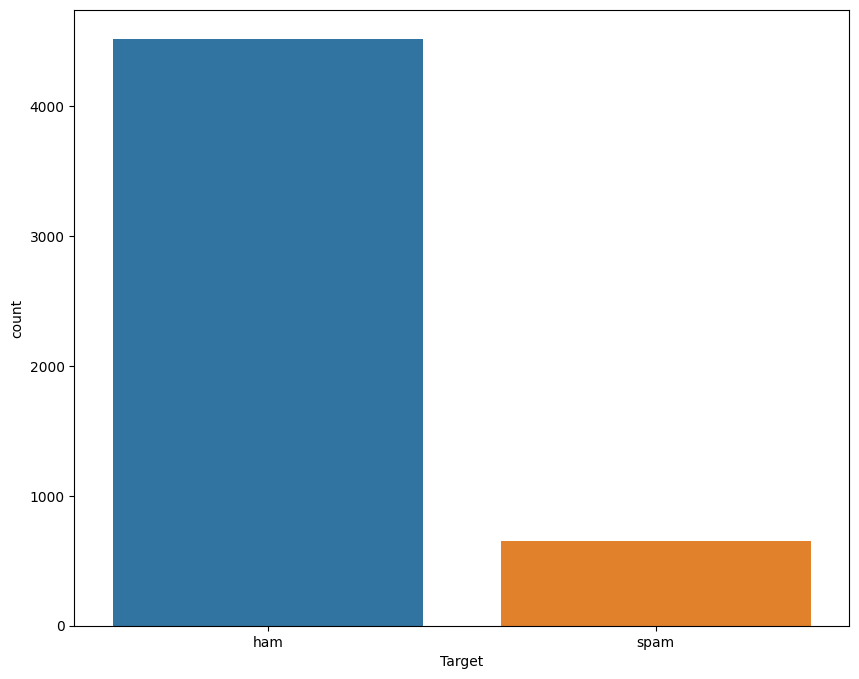

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x= df["Target"])
plt.show()

This code generates a pie chart to visualize the distribution of values in the "Target" column of the `df` DataFrame. It uses `value_counts()` to get the frequency of each class, then creates a pie chart with labels for each class and the percentage of each class's occurrence. The chart is displayed with a 90-degree starting angle and a title indicating the frequency distribution of the 'target' variable (ham or spam).

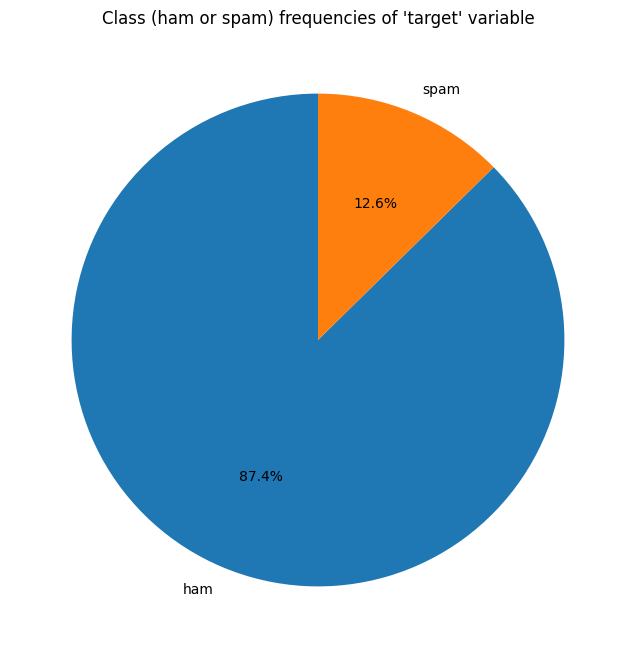

In [18]:
count = df["Target"].value_counts()
label = count.index

plt.figure(figsize=(10,8))
plt.pie(count, labels=label, autopct="%.1f%%", startangle=90)
plt.title(f"Class (ham or spam) frequencies of 'target' variable")
plt.show()

This code adds a new column, 'text_length', to the `df` DataFrame, which contains the length of each entry in the 'Text' column. It then plots a histogram with a kernel density estimate (KDE) to visualize the distribution of text lengths. The plot is displayed with labeled axes showing text length (in characters) on the x-axis and frequency on the y-axis, along with a title "Distribution of Text Length."

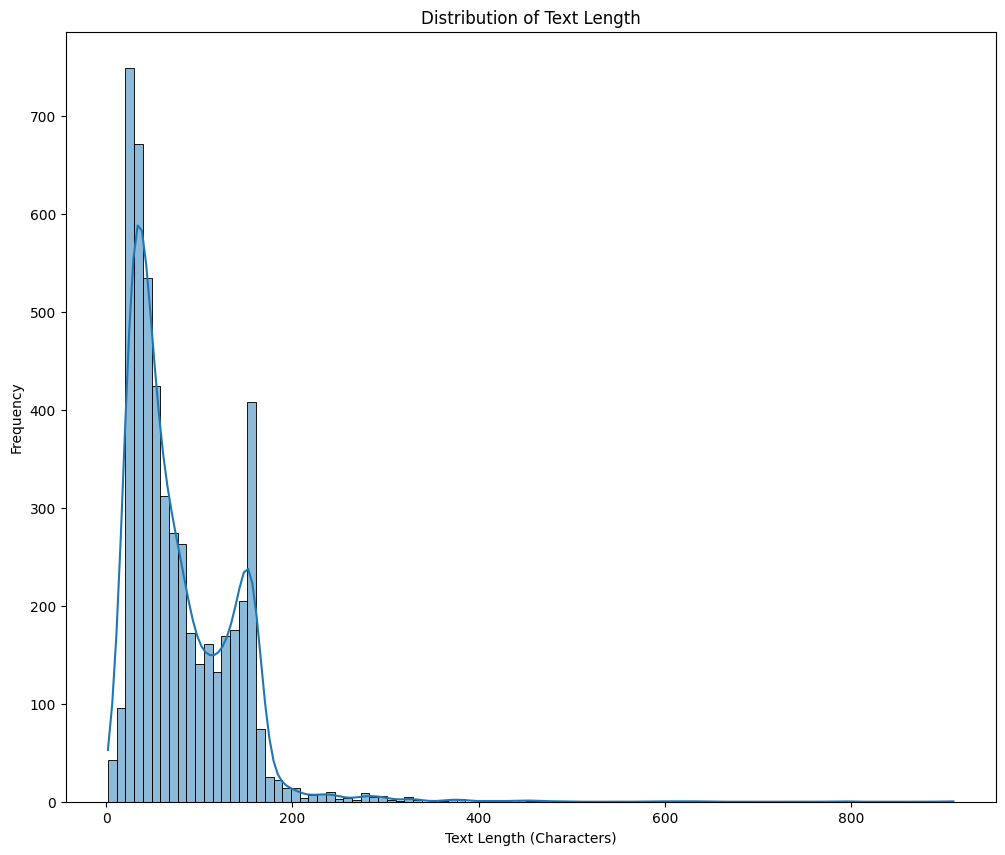

In [19]:
df['text_length'] = df['Text'].apply(len)


# Plot the distribution of text length
plt.figure(figsize=(12,10))
sns.histplot(df['text_length'], kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Frequency")
plt.show()

This code filters the DataFrame to extract only the "Text" entries labeled as "spam" in the "Target" column. It then calculates the length of each spam message and creates a histogram with a kernel density estimate (KDE) to visualize the distribution of text lengths for spam messages. The plot is displayed with a red color, labeled axes for text length and frequency, and a title indicating it's for spam messages.

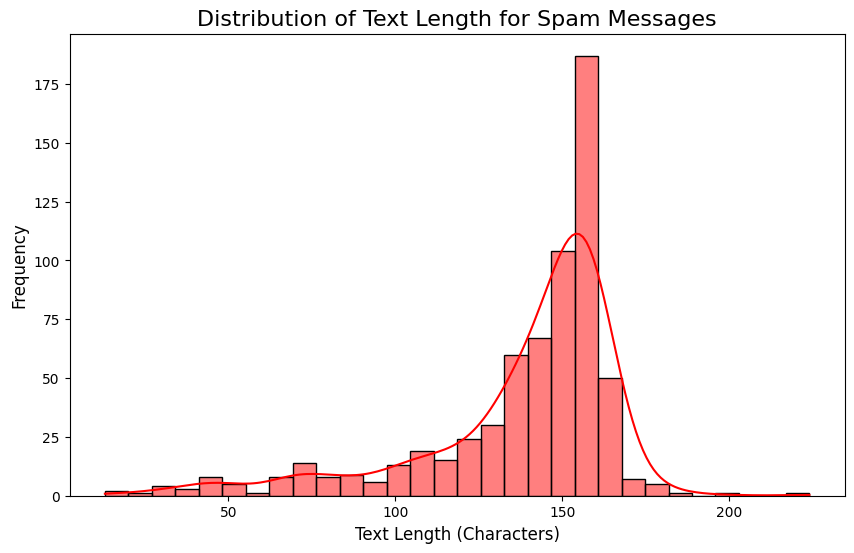

In [20]:
spam_text = df[df["Target"] == "spam"]["Text"]


spam_text_length = spam_text.apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(spam_text_length, kde=True, color="red", bins=30)

plt.title("Distribution of Text Length for Spam Messages", fontsize=16)
plt.xlabel("Text Length (Characters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()


This code filters the DataFrame to select the "Text" entries labeled as "ham" in the "Target" column. It then calculates the length of each ham message and creates a histogram with a kernel density estimate (KDE) to visualize the distribution of text lengths for ham messages. The plot is displayed with a red color, labeled axes for text length and frequency, and a title indicating it's for ham messages.

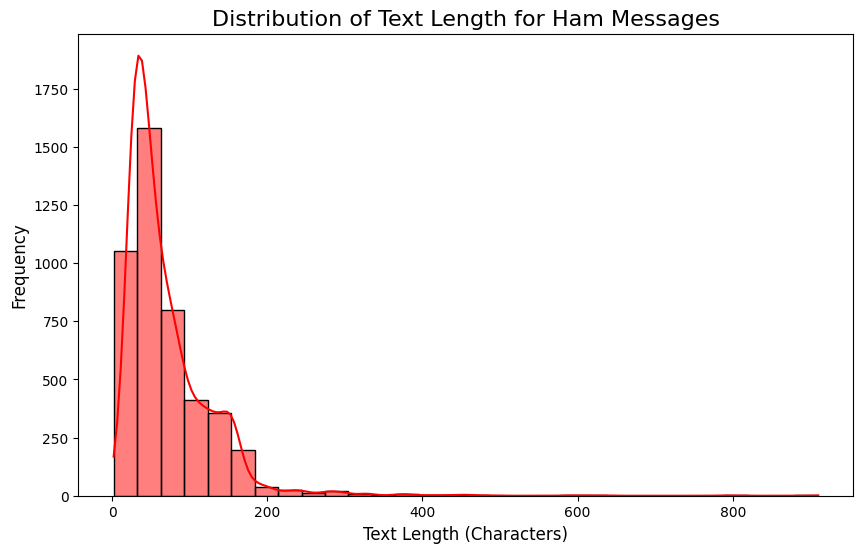

In [21]:
ham_text = df[df["Target"] == "ham"]["Text"]


ham_text_length = ham_text.apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(ham_text_length, kde=True, color="red", bins=30)

plt.title("Distribution of Text Length for Ham Messages", fontsize=16)
plt.xlabel("Text Length (Characters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()


## Get every words from dataset and append them to 'corpus' list

In [22]:
corpus = []

for i in df["Text"] :
    for j in i.split() :
        corpus.append(j.strip())

## Count the words

In [23]:
count_words = Counter(corpus)

cm = count_words.most_common(20)

dict(cm)

{'to': 1972,
 'you': 1562,
 'I': 1375,
 'a': 1198,
 'the': 1114,
 'and': 814,
 'in': 731,
 'i': 720,
 'is': 691,
 'u': 614,
 'for': 604,
 'my': 579,
 'me': 532,
 'of': 531,
 'your': 517,
 'have': 447,
 'on': 446,
 '2': 423,
 'that': 407,
 'it': 376}

This code generates a word cloud from the "Text" column of the `df` DataFrame. It combines all the text into a single string and visualizes the most frequent words using the `WordCloud` class. The word cloud is displayed with custom dimensions (1500x700), showing up to 500 words, and is rendered without axes for a clean visual. The plot includes a title and labeled axes for better understanding, although the axes are not displayed in the final image.

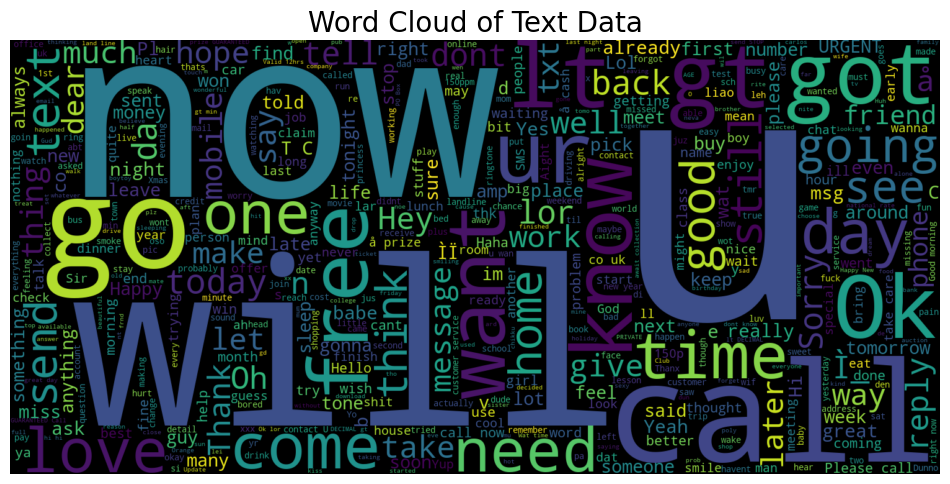

In [24]:
plt.figure(figsize=(12, 10))

wc = WordCloud(width=1500, height=700, max_words=500).generate(" ".join(df["Text"]))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Text Data", fontsize=20)
plt.xlabel("X-axis (Words)", fontsize=12)
plt.ylabel("Y-axis (Frequency)", fontsize=12)
plt.show()



### 🚀 **Transforming Raw Text into Clean Insights!**

In the world of NLP, the quality of data drives the performance of models. To harness the power of text data, we've built a **custom preprocessing pipeline** that takes raw, messy input and transforms it into a refined and insightful format for analysis.

Here’s what our function does step by step:

1. **Input Validation** 🛠️  
   - Ensures the input is a valid string. If it’s not, we handle it gracefully.

2. **Text Normalization** 🔡  
   - Converts all text to **lowercase** for uniformity.

3. **Noise Removal** 🚫  
   - Cleans out **URLs**, **digits**, and **non-alphanumeric characters**, leaving behind only the meaningful words.

4. **Tokenization** 🧩  
   - Splits the text into individual words for fine-grained analysis.

5. **Stopword Removal** 🗑️  
   - Filters out common words like “the” and “is” using the powerful **NLTK stopwords list**, ensuring only valuable words remain.

6. **Stemming for Compactness** 🌱  
   - Reduces words to their root forms (e.g., "running" becomes "run") using the robust **Snowball Stemmer**, ensuring consistency in word forms.

7. **Reconstruction** 🧱  
   - Rejoins the cleaned and processed words into a single, tidy string.

Finally, we **apply the preprocessing pipeline** to an entire dataset column and even measure the length of the cleaned text to gain further insights!

---

### **Why It Matters** 🌟  
With this preprocessing approach, we're turning noisy, unstructured text into a treasure trove of actionable insights. Whether it’s for sentiment analysis, topic modeling, or any other NLP task, this clean and compact representation of text ensures our models get the best possible input for high-performance results.

---

This kind of description makes the technical process feel intuitive and emphasizes its importance, attracting those interested in powerful data processing techniques.

In [25]:
def Preprocessing(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        return ""

    # Convert text to lowercase
    text = text.lower()

    # Remove URLs, digits, and non-alphanumeric characters
    text = re.sub(r"http\S+|\d|[^\w\s]", "", text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = [w for w in words if w not in stop_words]

    # Apply stemming
    st = SnowballStemmer("english")
    words = [st.stem(w) for w in words]

    # Join the words back into a single string
    cleaned_text = " ".join(words)

    return cleaned_text


df["cleaned_text"] = df["Text"].apply(Preprocessing)

df["cleaned_text_length"] = df["cleaned_text"].apply(len)

In [26]:
df.head(10)

,Target,Text,text_length,cleaned_text,cleaned_text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,76
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,21
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkts st ...,104
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goe usf live around though,41
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,freemsg hey darl week word back id like fun st...,79
6,ham,Even my brother is not like to speak with me. ...,77,even brother like speak treat like aid patent,45
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,per request mell mell oru minnaminungint nurun...,104
8,spam,WINNER!! As a valued network customer you have...,158,winner valu network custom select receivea å p...,93
9,spam,Had your mobile 11 months or more? U R entitle...,154,mobil month u r entitl updat latest colour mob...,85


In [27]:
df.shape

(5169, 5)

# Tokenization¶

## Initialize a Tokenizer object to preprocess text data.
## The Tokenizer is used to convert text into sequences of integers, where each unique word is assigned a unique integer.
## - fit_on_texts(df["cleaned_text"]): Fits the Tokenizer on the 'cleaned_text' column of the dataset, building a vocabulary based on the frequency of words.
## - word_index: Retrieves the dictionary mapping of words to their unique integer indices.
## - voc_size: Calculates the size of the vocabulary (i.e., the total number of unique words in the text).

In [28]:
tok = Tokenizer()

tok.fit_on_texts(df["cleaned_text"])

word_idex = tok.word_index

voc_size = len(word_idex) + 1

voc_size

7129

In [29]:
# padding data

sent_length = 500

sequences = tok.texts_to_sequences(df["cleaned_text"])

padding = pad_sequences(sequences , maxlen=sent_length , padding="post")

padding

array([[   4, 3025,  271, ...,    0,    0,    0],
       [  10,  229,  569, ...,    0,    0,    0],
       [  12,  413,  790, ...,    0,    0,    0],
       ...,
       [7127, 1396, 7128, ...,    0,    0,    0],
       [ 142, 1195, 1536, ...,    0,    0,    0],
       [1909,  437,  173, ...,    0,    0,    0]], dtype=int32)


1. **Handle Missing Values**: Ensure that the data in the "Target" column has no missing values by applying appropriate data preprocessing techniques like padding or imputation.

2. **Encode Categorical Data**: Use `LabelEncoder` to convert the categorical values in the "Target" column into numerical values that the machine learning model can process.

3. **Prepare the Target Variable**: Assign the encoded "Target" column as the `y` variable, representing the dependent variable for your machine learning model.

In [30]:
X = padding

encode = LabelEncoder()
df["Target"] = encode.fit_transform(df["Target"])

y = df["Target"]

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

print(f"X Train shape is ===> {X_train.shape}")
print(f"y Train shape is ===> {y_train.shape}")
print(f"X Test shape is ===> {X_test.shape}")
print(f"y Test shape is ===> {y_test.shape}")

X Train shape is ===> (4135, 500)
y Train shape is ===> (4135,)
X Test shape is ===> (1034, 500)
y Test shape is ===> (1034,)


In [32]:
X_train_valid , X_test_valid , y_train_valid , y_test_valid = train_test_split(X_train , y_train , test_size=0.2 , random_state=42)

print(f"X Train valid shape is ===> {X_train_valid.shape}")
print(f"y Train valid shape is ===> {y_train_valid.shape}")
print(f"X Test valid shape is ===> {X_test_valid.shape}")
print(f"y Test valid shape is ===> {y_test_valid.shape}")

X Train valid shape is ===> (3308, 500)
y Train valid shape is ===> (3308,)
X Test valid shape is ===> (827, 500)
y Test valid shape is ===> (827,)


In [33]:
# Apply SMOTE on Training Data

somt = SMOTE(random_state=42)

X_train_final , y_train_final = somt.fit_resample(X_train_valid , y_train_valid)


print(f"X Train Final shape is ===> {X_train_final.shape}")
print(f"y Train Final shape is ===> {y_train_final.shape}")

X Train Final shape is ===> (5784, 500)
y Train Final shape is ===> (5784,)


# Deep learning model

#### Long Short-term Memory (LSTM)¶#### 
LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images. This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.#### 

The Logic Behind LS#### TM
The central role of an LSTM model is held by a memory cell known as a ‘cell state’ that maintains its state over time. The cell state is the horizontal line that runs through the top of the below diagram. It can be visualized as a conveyor belt through which information just flows, unchanged. Information can be added to or removed from the cell state in LSTM and is regulated by gates. These gates optionally let the information flow in and out of the cell. It contains a pointwise multiplication operation and a sigmoid neural net layer that assist the mechanism.

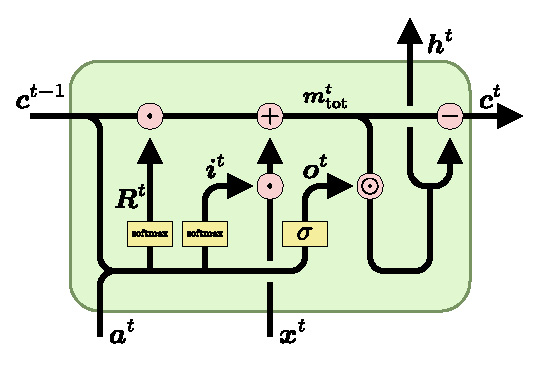
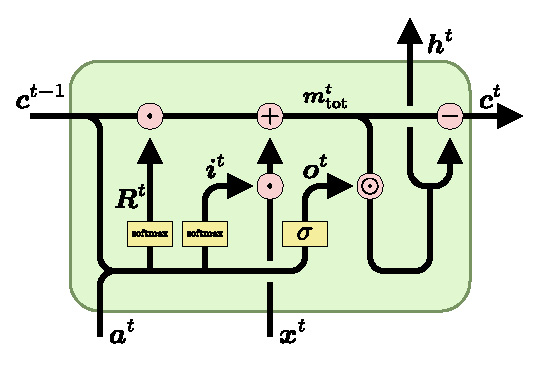

#### What are Bidirectional LSTMs?¶##### 
These are like an upgrade over LSTMs. In bidirectional LSTMs, each training sequence is presented forward and backward so as to separate recurrent nets. Both sequences are connected to the same output layer. Bidirectional LSTMs have complete information about every point in a given sequence, everything before and after it. But, how do you rely on the information that hasn’t happened yet? The human brain uses its senses to pick up information from words, sounds, or from whole sentences that might, at first, make no sense but mean something in a future context. Conventional recurrent neural networks are only capable of using the previous context to get information. Whereas, in bidirectional LSTMs, the information is obtained by processing the data in both directions within two hidden layers, pushed toward the same output layer. This helps bidirectional LSTMs access long-range context in both directions.

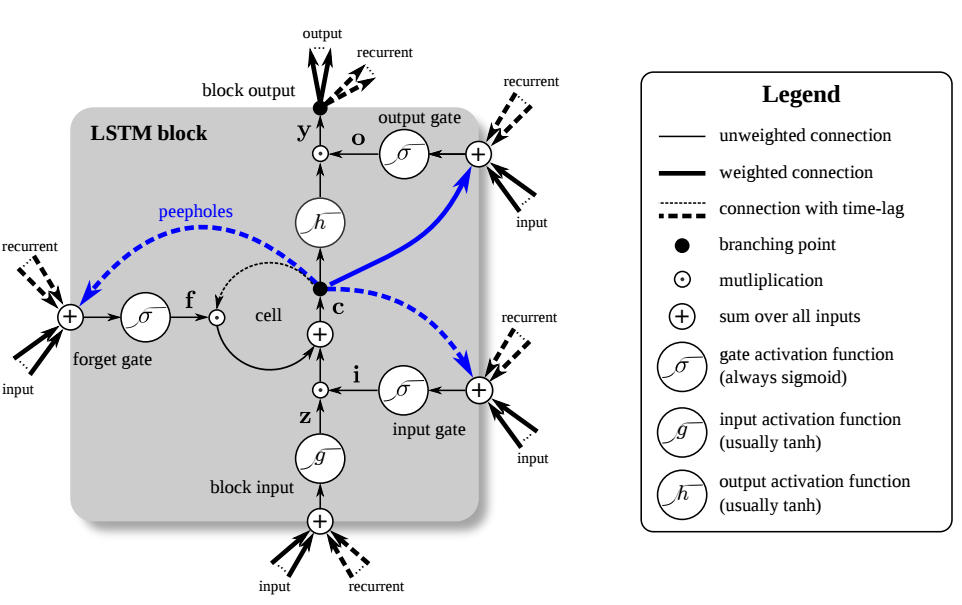
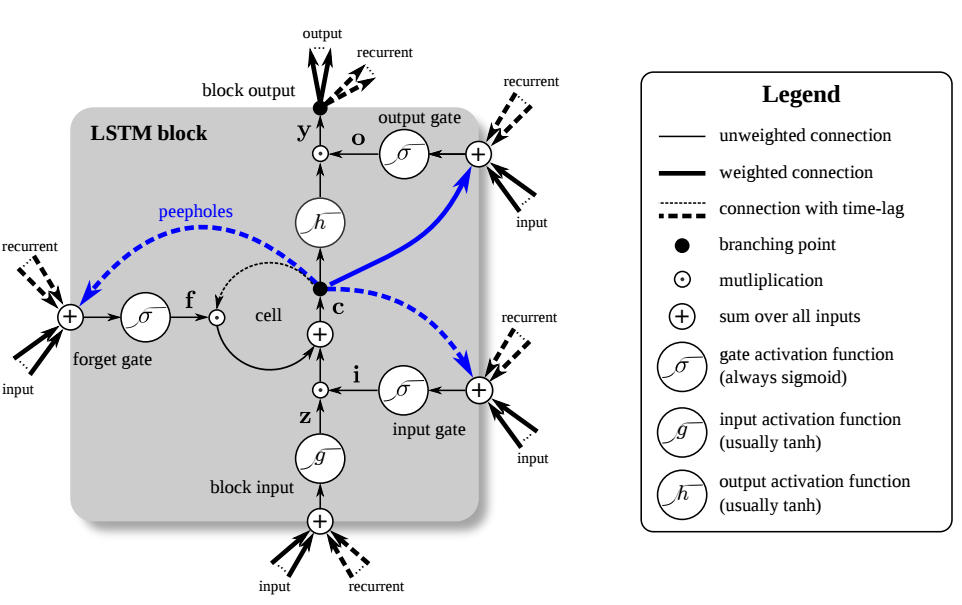

## Building an LSTM (Long Short-Term Memory) architecture

In [34]:
embedding_vector_features = 40


model = Sequential()

model.add(Embedding(voc_size , embedding_vector_features , input_length=sent_length))
model.add(SpatialDropout1D(0.3))

model.add(Bidirectional(LSTM(units=128 , dropout=0.3 , recurrent_dropout=0.2 , return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64 , activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1 , activation="sigmoid"))

model.compile(loss="binary_crossentropy" ,optimizer=Adam(learning_rate=0.001),  metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
early = EarlyStopping(patience=10 ,
                      monitor='val_loss',  
                      restore_best_weights=True)


# Train Model
history = model.fit(X_train_final , 
                    y_train_final , 
                    validation_data=[X_test_valid , y_test_valid] , 
                    epochs=10,
                    batch_size=256, 
                    callbacks=[early])


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.6307 - loss: 0.6744 - val_accuracy: 0.7823 - val_loss: 0.4643
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.8404 - loss: 0.4032 - val_accuracy: 0.8670 - val_loss: 0.3250
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9071 - loss: 0.2609 - val_accuracy: 0.8863 - val_loss: 0.2945
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9319 - loss: 0.2033 - val_accuracy: 0.8827 - val_loss: 0.3101
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9500 - loss: 0.1635 - val_accuracy: 0.9069 - val_loss: 0.2845
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9569 - loss: 0.1391 - val_accuracy: 0.8839 - val_loss: 0.3675
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.9660 - loss: 0.1097 - val_accuracy: 0.8513 - val_loss: 0.4836
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9673 - loss: 0.1010 - val_accuracy: 0.8996 - val_loss:

In [36]:
loss , acc = model.evaluate(X_train_final , y_train_final)
print("Loss of Training is == ",loss)
print("accuracy of Training is == ",acc)

print("====================================================================")

loss , acc = model.evaluate(X_test_valid , y_test_valid)
print("Loss of Testing is == ",loss)
print("accuracy of Testing is == ",acc)

181/181 ━━━━━━━━━━━━━━━━━━━━ 33s 182ms/step - accuracy: 0.9777 - loss: 0.0838
Loss of Training is ==  0.12098391354084015
accuracy of Training is ==  0.9623098373413086
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.9136 - loss: 0.2775
Loss of Testing is ==  0.2844669818878174
accuracy of Testing is ==  0.9068923592567444


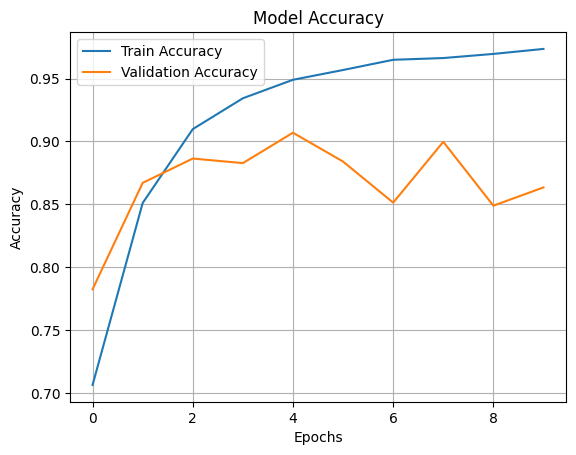

In [37]:
plt.plot(history.history["accuracy"] , label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

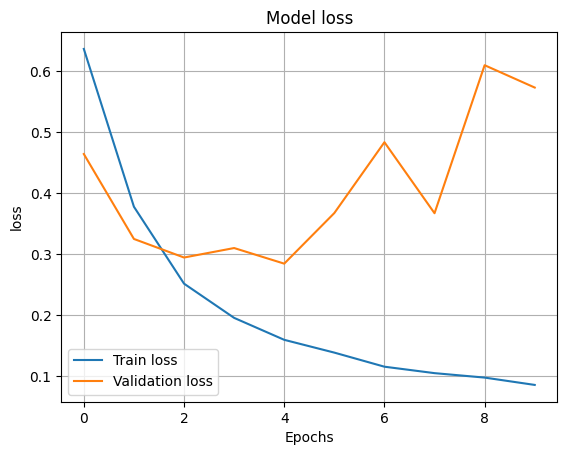

In [38]:
plt.plot(history.history["loss"] , label="Train loss")
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.grid(True)
plt.show()

In [39]:
y_pred = model.predict(X_test_valid)
y_pred = (y_pred > 0.5).astype(int)

pd.DataFrame(y_pred[:10] , columns=["Prediction"]).T

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step


,0,1,2,3,4,5,6,7,8,9
Prediction,0,0,0,0,1,0,0,0,0,0


In [40]:
cm = confusion_matrix(y_pred , y_test_valid)
print(f"confusion atrix \n {cm}")

confusion atrix 
 [[665   7]
 [ 70  85]]


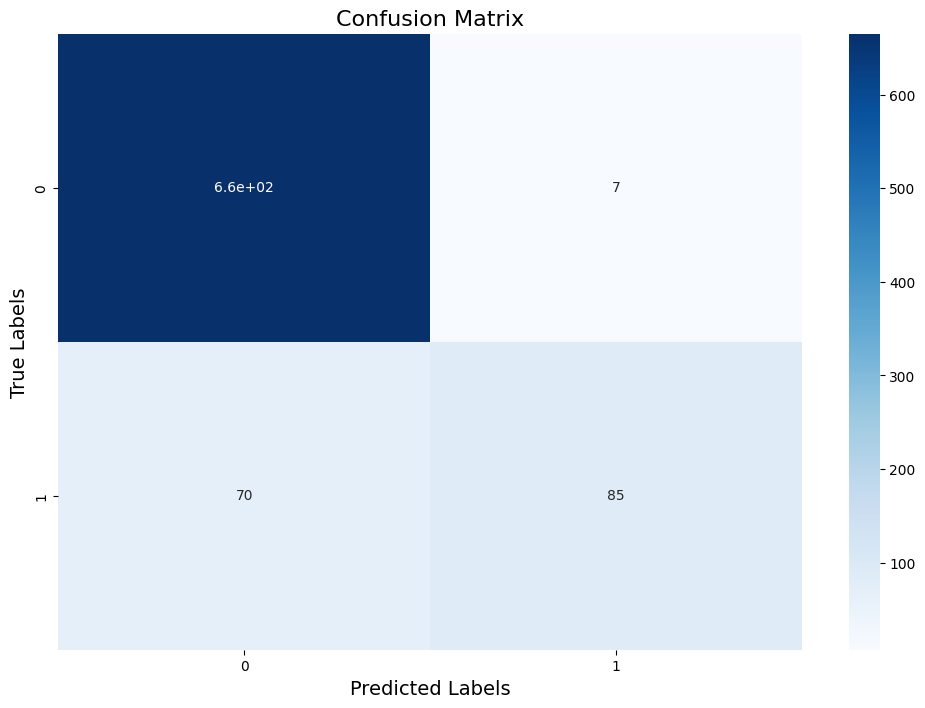

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm , annot=True , cbar=True , cmap="Blues")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

In [42]:
print("classification report \n")
print(classification_report(y_pred , y_test_valid))

classification report 

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       672
           1       0.92      0.55      0.69       155

    accuracy                           0.91       827
   macro avg       0.91      0.77      0.82       827
weighted avg       0.91      0.91      0.90       827



In [43]:
df["Target"].value_counts()


Target
0    4516
1     653
Name: count, dtype: int64

In [44]:
input_text = X_test[0]

# Add an extra dimension to make it (1, sequence_length)
input_text = np.expand_dims(input_text, axis=0)

# Make the prediction
prediction = model.predict(input_text)

if prediction[0][0] > 0.5 :
    print("Ham")
else :
    print("Spam")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Spam


#  build a GRU (Gated Recurrent Unit) architecture 

In [45]:
model2 = Sequential()

model2.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))

model2.add(Bidirectional(GRU(128, return_sequences=True))) 
model2.add(Dropout(0.3))

model2.add(GRU(64, return_sequences=True)) 
model2.add(Dropout(0.3))

model2.add(GlobalMaxPooling1D())

model2.add(Dense(1, activation="sigmoid"))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
early2 = EarlyStopping(monitor='val_loss',
                       patience=10,
                           restore_best_weights=True
                       
)


history2 = model2.fit(X_train_final ,
                      y_train_final ,
                     batch_size=256,
                    epochs=10,
                     callbacks=[early2],
                     validation_data=[X_test_valid,y_test_valid])


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.6565 - loss: 0.6571 - val_accuracy: 0.7860 - val_loss: 0.4791
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.8652 - loss: 0.3603 - val_accuracy: 0.8489 - val_loss: 0.3587
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.9121 - loss: 0.2475 - val_accuracy: 0.8525 - val_loss: 0.3621
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.9479 - loss: 0.1551 - val_accuracy: 0.8730 - val_loss: 0.3355
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.9730 - loss: 0.1106 - val_accuracy: 0.8416 - val_loss: 0.4498
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.9791 - loss: 0.0894 - val_accuracy: 0.8501 - val_loss: 0.4465
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.9832 - loss: 0.0781 - val_accuracy: 0.8597 - val_loss: 0.4371
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.9840 - loss: 0.0742 - val_accuracy: 0.8730 - val_loss:

In [47]:
loss , acc = model2.evaluate(X_train_final , y_train_final)
print("Loss of Training is == ",loss)
print("accuracy of Training is == ",acc)

print("====================================================================")

loss , acc = model2.evaluate(X_test_valid , y_test_valid)
print("Loss of Testing is == ",loss)
print("accuracy of Testing is == ",acc)

181/181 ━━━━━━━━━━━━━━━━━━━━ 31s 169ms/step - accuracy: 0.9753 - loss: 0.1562
Loss of Training is ==  0.1598004698753357
accuracy of Training is ==  0.9707814455032349
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.8796 - loss: 0.3283
Loss of Testing is ==  0.33547013998031616
accuracy of Testing is ==  0.8730350732803345


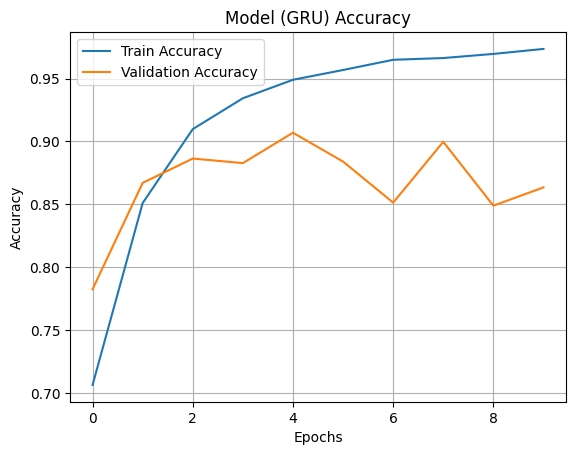

In [48]:
plt.plot(history.history["accuracy"] , label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model (GRU) Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

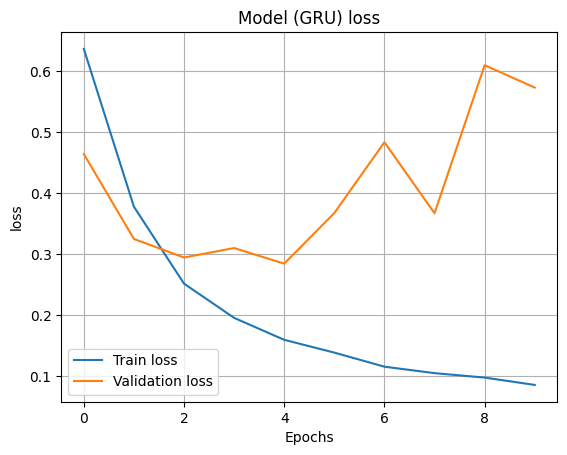

In [49]:
plt.plot(history.history["loss"] , label="Train loss")
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Model (GRU) loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
y_pred = model2.predict(X_test_valid)
y_pred = (y_pred > 0.5).astype(int)

pd.DataFrame(y_pred[:10] , columns=["Prediction"]).T

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step


,0,1,2,3,4,5,6,7,8,9
Prediction,1,0,0,0,1,0,0,0,0,0


In [51]:
cm = confusion_matrix(y_pred , y_test_valid)
print(f"confusion matrix \n {cm}")

confusion matrix 
 [[635   5]
 [100  87]]


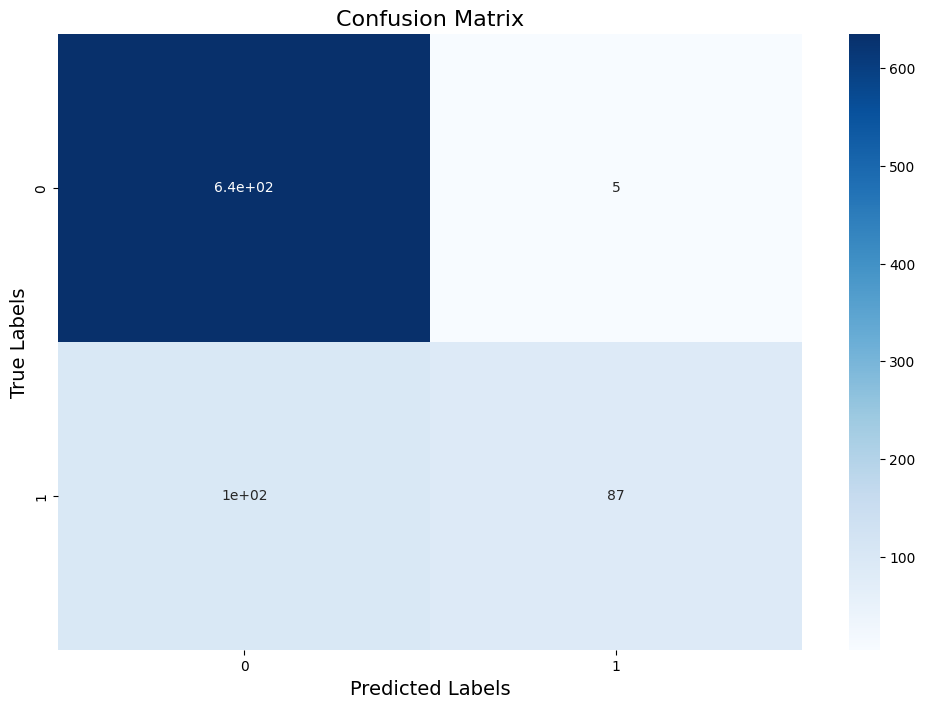

In [52]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm , annot=True , cbar=True , cmap="Blues")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

In [53]:
print("classification report \n")
print(classification_report(y_pred , y_test_valid))

classification report 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       640
           1       0.95      0.47      0.62       187

    accuracy                           0.87       827
   macro avg       0.90      0.73      0.77       827
weighted avg       0.88      0.87      0.86       827



In [54]:
input_text = X_test[0]

# Add an extra dimension to make it (1, sequence_length)
input_text = np.expand_dims(input_text, axis=0)

# Make the prediction
prediction = model2.predict(input_text)

if prediction[0][0] > 0.5 :
    print("Ham")
else :
    print("Spam")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Spam


# END

# By : Sayed Ali